# Lab 1: Birthday Probability
Submitted By: Julian Singkham  
Date: 12/10/2020

## Abstract
The purpose of this lab is to calculate the probability of an x group of people having the same birthday assuming there are only 365 days a year and every day has an equal probability of being a birthday

### Parameters

In [1]:
import random
from collections import Counter
import matplotlib.pyplot as plt

group_size = 32
number_of_simulations = 10000

### Functions
Generates a list of birthdays

**Param** size: Size of the birthday list, default size of 23

**Return**:The randomly generated list of birthdays

In [2]:
def generate_birthdays(size = 23):
    '''
    Generates a list of randomized birthdays of a given size.
    If no size is given then the defualt size is 23
    '''
    randomlist = []
    for i in range(0, size):
        n = random.randint(1,365)
        randomlist.append(n)
    return randomlist

Filters a given birthday list to the ones that are in common

**Param** birthday_list: A list of birthdays

**Return** A list of birthdays that two or more people have in common

In [3]:
def compare_birthdays(birthday_list):
    #Counter is used to tally how many people have the same birthday
    collisions = Counter(birthday_list)
    #(Ref 1) A second counter is used to filter for birthdays that two or more people share.
    collisions_filtered = Counter({k: collisions for k, collisions in collisions.items() if collisions > 1})
    return collisions_filtered

Simulates the probability that two or more people will have the same birthday

**Param** count: How many times to run the simulation

**Return** None

In [4]:
def simulation(count):
    collisions = 0
    for i in range(0, count):
        birthday_list = generate_birthdays(group_size)
        #Convert counter to list
        collisions_list = compare_birthdays(birthday_list).most_common()
        if len(collisions_list) > 0:
            collisions = collisions+1
    probability = round((collisions/number_of_simulations)*100,2)
    
    
    
    print("The probability of a group of size", group_size, 
          "having a common birthday is", probability, "%")
    

Finds the minimum group size to have a probablity greater than 50% that two people share the same birthday. Also generates a graph of the group size vs probability.

**Param** None

**Return** None

In [5]:
def simulation_smallest_size():
    minimum = 1
    flag = 1
    probability_list = []
    size_list = []
    while(flag):
        collisions = 0
        for i in range(0, 10000):
            birthday_list = generate_birthdays(minimum)
            #Convert counter to list
            collisions_list = compare_birthdays(birthday_list).most_common()
            if len(collisions_list) > 0:
                collisions = collisions + 1
        probability = round((collisions/number_of_simulations)*100,2)
        probability_list.append(probability)
        size_list.append(minimum)
        if probability > 50: #Changin this number sets the probability threshhold
            flag = 0
        else:
            minimum = minimum + 1
            
    plt.scatter(probability_list, size_list)
    plt.xlabel("Probability", fontsize=16)
    plt.xticks(rotation=90)
    plt.ylabel("Group size", fontsize=16)
    
    print("The minimum group size required to have a probability greater 50% that two people", 
          "share the same birthday is ", minimum)

The minimum group size required to have a probability greater 50% that two people share the same birthday is  23


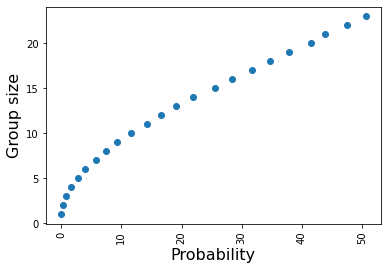

In [6]:
simulation_smallest_size()

In [8]:
%timeit simulation(number_of_simulations)

The probability of a group of size 32 having a common birthday is 75.23 %
The probability of a group of size 32 having a common birthday is 75.02 %
The probability of a group of size 32 having a common birthday is 75.51 %
The probability of a group of size 32 having a common birthday is 75.28 %
The probability of a group of size 32 having a common birthday is 75.27 %
The probability of a group of size 32 having a common birthday is 75.06 %
The probability of a group of size 32 having a common birthday is 75.44 %
The probability of a group of size 32 having a common birthday is 75.38 %
358 ms ± 8.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Conclusion  
Overall the lab wasn't too difficult to complete and the results are pretty interesting. In comparison to Rosie, both systems run the algorithm at the same time which doesn't make sense to me as Rosie should have a much faster CPU. I believe this may be due to the overhead caused by the scheduling system and the fact that the algorithm itself has a short run time (only 10000 iterations are done). Secondly it seems very strange to me that given a group size of 23 and 365 possible birthdays, the probability that two people have the same birthday is 50%. I assumed it would have to be 1/4 of the data size. Learning how counter works in linux was really intersting as and definitely helped speed up the process of checking for birthday collisions.

## References

(1) Utilized the information in this link to filter out unique counts in collisons counter.  
https://stackoverflow.com/questions/15861739/removing-objects-whose-counts-are-less-than-threshold-in-counter

1.) What is the probability of a group of size 20 that at least one pair has the same birthday?  
    It's about 40%
    
2.) What is the smallest group size to have a probability of greater than 50% that two people share the same birthday?  
    The smallest group is 23.
    
3.) How large of an N is necessary to provide confidence in your answer?  
    A size of 32 would be necessary as I believe a ~75% accuracy is good enough for me.
    
4.) How is this problem related to hash collisions?  
    This problem is basically the same as hash collisions as a birthday can be seen the same as the hash value of an object and     the length of a year is the same as the size of the hash table.